# LaserTrade – Predikce trhu
Tento notebook predikuje cenu BTC pomocí RSI, EMA a ML modelu.

In [143]:
import sys, os
sys.path.append(os.path.abspath("../src"))


from data_loader import load_data

df = load_data("BTC-USD")

df.head()


c:\Users\marti\LaserTrade\src\data_loader.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-09-14,26539.673828,26774.623047,26171.451172,26228.277344,13811359124
2023-09-15,26608.693359,26840.498047,26240.701172,26533.818359,11479735788
2023-09-16,26568.281250,26754.769531,26473.890625,26606.199219,7402031417
2023-09-17,26534.187500,26617.998047,26445.074219,26567.927734,6774210670
2023-09-18,26754.281250,27414.734375,26415.515625,26532.994141,15615339655


In [144]:
# Přidání indikátorů

from indicators import add_indicators

df = add_indicators(df)  
df.head()

Price,Close,High,Low,Open,Volume,EMA_20,RSI
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2023-09-14,26539.673828,26774.623047,26171.451172,26228.277344,13811359124,26539.673828,NaN
2023-09-15,26608.693359,26840.498047,26240.701172,26533.818359,11479735788,26575.909082,NaN
2023-09-16,26568.281250,26754.769531,26473.890625,26606.199219,7402031417,26573.108188,NaN
2023-09-17,26534.187500,26617.998047,26445.074219,26567.927734,6774210670,26561.872387,NaN
2023-09-18,26754.281250,27414.734375,26415.515625,26532.994141,15615339655,26608.414454,NaN


In [145]:
# Predikce
from model import train_model

df, model, acc = train_model(df)
print("Model accuracy:", acc)
df.tail()


Model accuracy: 0.4722222222222222


c:\Users\marti\LaserTrade\src\model.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[X_test.index, 'Prediction'] = y_pred


Price,Close,High,Low,Open,Volume,EMA_20,RSI,Target,Prediction
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
Date,,,,,,,,,
2025-09-10,113955.359375,114275.250000,110940.078125,111531.250000,56377473784,112030.528806,58.424271,1,0.0
2025-09-11,115507.539062,115522.546875,113453.835938,113961.429688,45685065332,112361.672640,59.004074,1,0.0
2025-09-12,116101.578125,116769.382812,114794.484375,115507.789062,54785725894,112717.854115,79.780780,0,0.0
2025-09-13,115950.507812,116334.632812,115248.273438,116093.562500,34549454947,113025.725896,78.195108,1,0.0
2025-09-14,116161.343750,116161.343750,115548.968750,115951.906250,31895144448,113324.356168,82.199372,0,0.0


In [146]:
# Predikce zítřka

# Poslední řádek dat
last_row = df.iloc[[-1]]

# Funkce modelu potřebuje tyto sloupce
features = ['Close', 'EMA_20', 'RSI', 'Volume']
X_last = last_row[features]

# Predikce
pred = model.predict(X_last)[0]

# Výpis
if pred == 1:
    print("Predikce pro zítra: TRH PŮJDE NAHORU ↑")
else:
    print("Predikce pro zítra: TRH PŮJDE DOLŮ ↓")


Predikce pro zítra: TRH PŮJDE DOLŮ ↓


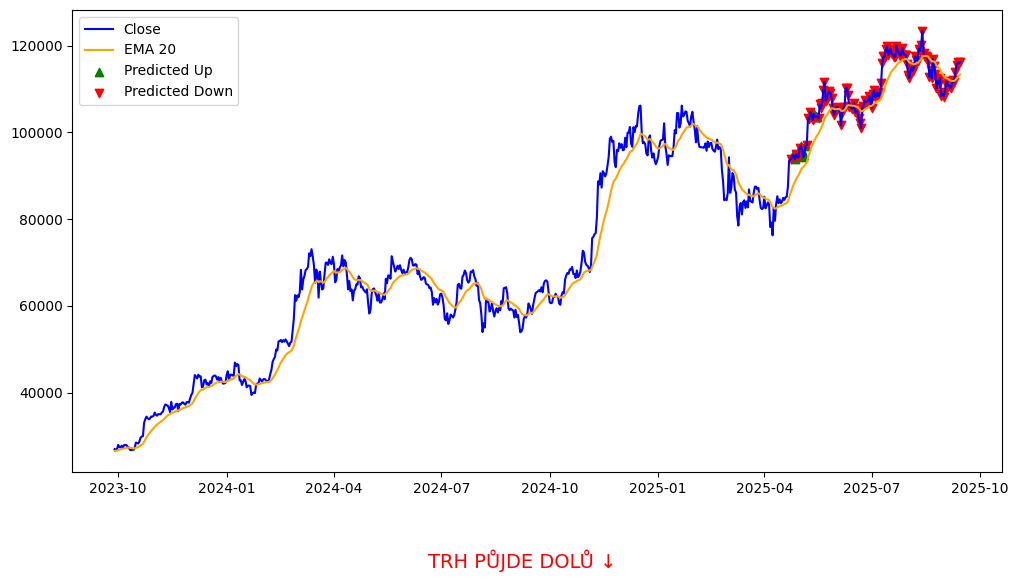

In [ ]:
# Vizualizace


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Close a EMA
plt.plot(df.index, df['Close'], label='Close', color='blue')
plt.plot(df.index, df['EMA_20'], label='EMA 20', color='orange')

# Predikce růstu/poklesu
plt.scatter(df.index[df['Prediction']==1], df['Close'][df['Prediction']==1],
            label='Predicted Up', color='green', marker='^')
plt.scatter(df.index[df['Prediction']==0], df['Close'][df['Prediction']==0],
            label='Predicted Down', color='red', marker='v')

# Predikce posledního dne
last_row = df.iloc[[-1]]
features = ['Close', 'EMA_20', 'RSI', 'Volume']
X_last = last_row[features]
pred = model.predict(X_last)[0]

if pred == 1:
    prediction_text = "TRH PŮJDE NAHORU ↑"
    color = "green"
else:
    prediction_text = "TRH PŮJDE DOLŮ ↓"
    color = "red"

# Text pod graf (souřadnice 0.5 = střed, 0.0 = úplně dole)
plt.figtext(0.5, -0.05, prediction_text, fontsize=14, color=color, ha='center')

plt.legend()
plt.show()

